In [1]:
!pip install gradio==3.50

In [2]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras
import pathlib

In [3]:
data_dir = pathlib.Path("C:/Users/S G Sumanth/Downloads/ACNE_DATASET/ACNE DATASET")

In [4]:
# Loading the images
img_height, img_width = 180, 180
batch_size = 32

In [5]:
# Prepare the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 227 files belonging to 2 classes.
Using 182 files for training.


In [6]:
# Prepare the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 227 files belonging to 2 classes.
Using 45 files for validation.


In [7]:
# Classes in the dataset
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['Acne', 'non acne']


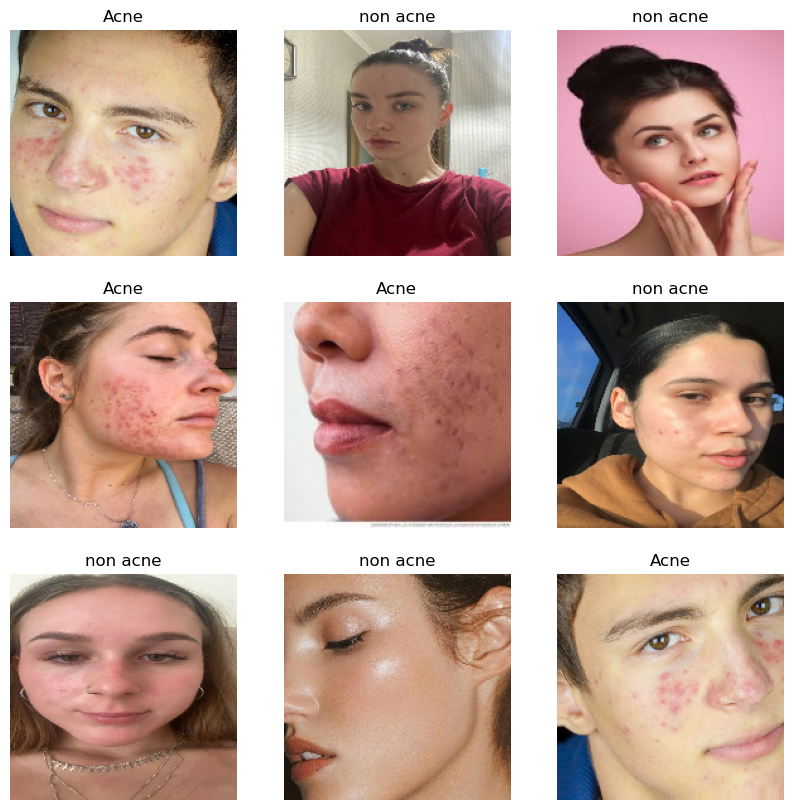

In [8]:
# Visualize sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
# Define the model
num_classes = len(class_names)

model = Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Updated Rescaling
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

C:\Users\S G Sumanth\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [11]:
# Train the model
epochs = 25
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/25


C:\Users\S G Sumanth\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 666ms/step - accuracy: 0.5290 - loss: 0.8602 - val_accuracy: 0.3556 - val_loss: 0.8125
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 577ms/step - accuracy: 0.4751 - loss: 0.7205 - val_accuracy: 0.7111 - val_loss: 0.6417
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 581ms/step - accuracy: 0.6135 - loss: 0.6526 - val_accuracy: 0.5556 - val_loss: 0.6793
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 560ms/step - accuracy: 0.6537 - loss: 0.6307 - val_accuracy: 0.7556 - val_loss: 0.5979
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 560ms/step - accuracy: 0.7515 - loss: 0.5358 - val_accuracy: 0.7333 - val_loss: 0.5867
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 495ms/step - accuracy: 0.8560 - loss: 0.3969 - val_accuracy: 0.7778 - val_loss: 0.6651
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 525ms/step - accuracy: 0.8194 - loss: 0.3668 - val_accuracy: 0.7778 - val_loss: 0.7163
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 506ms/step - accuracy: 0.8793 - loss: 0.2867 - val_accuracy: 0.5111 - val_loss: 0.9807
Ep

In [12]:
# Prediction function
def predict_image(img):
    img_4d = img.reshape(-1, img_height, img_width, 3)
    prediction = model.predict(img_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(num_classes)}

In [ ]:
# Gradio interface
image = gr.inputs.Image(shape=(img_height, img_width))
label = gr.outputs.Label(num_top_classes=num_classes)

gr.Interface(fn=predict_image, inputs=image, outputs=label, interpretation='default').launch(debug=True)

C:\Users\S G Sumanth\AppData\Local\Temp\ipykernel_14688\3692362266.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(img_height, img_width))
C:\Users\S G Sumanth\AppData\Local\Temp\ipykernel_14688\3692362266.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(img_height, img_width))
C:\Users\S G Sumanth\AppData\Local\Temp\ipykernel_14688\3692362266.py:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=num_classes)
C:\Users\S G Sumanth\AppData\Local\Temp\ipykernel_14688\3692362266.py:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_to

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
